# implement k-Means scratch

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
data = load_iris() 

In [3]:
X = data.data[:, :2]

In [4]:
class KMeans:
    def __init__(self, n_clusters=3, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
        # Randomly initialize cluster centroids

    def fit(self, X):
        np.random.seed(42)
        random_idx = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[random_idx]
        
        for _ in range(self.max_iter):
            # Assign clusters based on closest centroid
            self.labels = self._assign_clusters(X)
            # Calculate new centroids
            new_centroids = self._calculate_centroids(X)
            
            # Stop if centroids don't change
            if np.all(self.centroids == new_centroids):
                break
            
            self.centroids = new_centroids
            
    def _assign_clusters(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def _calculate_centroids(self, X):
        return np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])
    
    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
        

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

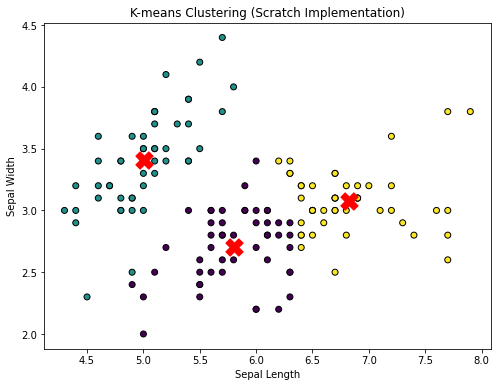

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red', marker='X')  # Centroids
plt.title('K-means Clustering (Scratch Implementation)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()